# Postprocessing a FNN Trained for a Mass-Spring-Damper System 

In [1]:
### Loading Libraries

import os
import sys
import numpy                              as np
import pandas                             as pd

import matplotlib
from matplotlib                           import pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from tensorflow                           import keras

import romnet                             as rmnt

In [2]:
### Input Data

jPOD          = 2

ROMNetFldr    = WORKSPACE_PATH + '/ROMNet/romnet/'

#PathToRunFld  = WORKSPACE_PATH + '/ROMNet/MSD_100Cases_POD_'+str(jPOD)+'_Branch/FNN/Deterministic/Run_1/'
#PathToRunFld  = WORKSPACE_PATH + '/ROMNet/MSD_100Cases_POD_All_Branch_'+str(jPOD)+'/FNN/Deterministic/Run_1/'

PathToRunFld  = WORKSPACE_PATH + '/ROMNet/MSD_100Cases_POD_All_Branch_'+str(jPOD)+'/FNN_BbB/Deterministic/Run_1/'

TrainingCases = [0]#[0,2,4,6,8]
TestCases     = [0,2,4]#[0,2]

NSamples      = 100

Nt            = 100
tout          = np.linspace(0.,15.,Nt)
SOLVER        = 'Radau'

LineTypeVec   = ['-',':','--','.-']*10

In [3]:
print("\n[ROMNet]: Reading Input File from: ", PathToRunFld)
sys.path.insert(0, PathToRunFld)

print("\n[ROMNet]: Keep Loading Modules and Functions...")
from ROMNet_Input import inputdata

print("\n[ROMNet]: Initializing Input ...")
InputData               = inputdata(WORKSPACE_PATH, ROMNetFldr)


InputData.InputFilePath = PathToRunFld+'/ROMNet_Input.py'
InputData.TrainIntFlg   = 0
InputData.PathToRunFld  = PathToRunFld


[ROMNet]: Reading Input File from:  /Users/sventuri/WORKSPACE//ROMNet/MSD_100Cases_POD_All_Branch_2/FNN_BbB/Deterministic/Run_1/

[ROMNet]: Keep Loading Modules and Functions...

[ROMNet]: Initializing Input ...


In [4]:
SurrogateType = InputData.SurrogateType
if (SurrogateType == 'FNN-SourceTerms'):
    SurrogateType = 'FNN'

Net   = getattr(rmnt.nn, SurrogateType)

model = rmnt.model.Model_Deterministic(InputData)

model.build(InputData, None, Net)

NN    = model.net


[ROMNet]:   Initializing the ML Model

[ROMNet]:   Building the ML Model


/usr/local/lib/python3.8/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  loc = add_variable_fn(
/usr/local/lib/python3.8/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  untransformed_scale = add_variable_fn(



[ROMNet]:   Loading ML Model Parameters from File:  /Users/sventuri/WORKSPACE//ROMNet/MSD_100Cases_POD_All_Branch_2/FNN_BbB/Deterministic/Run_1//Training/Params//002623.h5
'load_params' took 0.109376 s


[ROMNet]:   Saving ML Model Parameters to File:  /Users/sventuri/WORKSPACE//ROMNet/MSD_100Cases_POD_All_Branch_2/FNN_BbB/Deterministic/Run_1//Model/Params/Initial.h5
'save_params' took 0.077628 s

'build' took 3.125923 s



iPOD =  1


Text(0, 0.5, '$\\alpha_{x_2}$, from FNN')

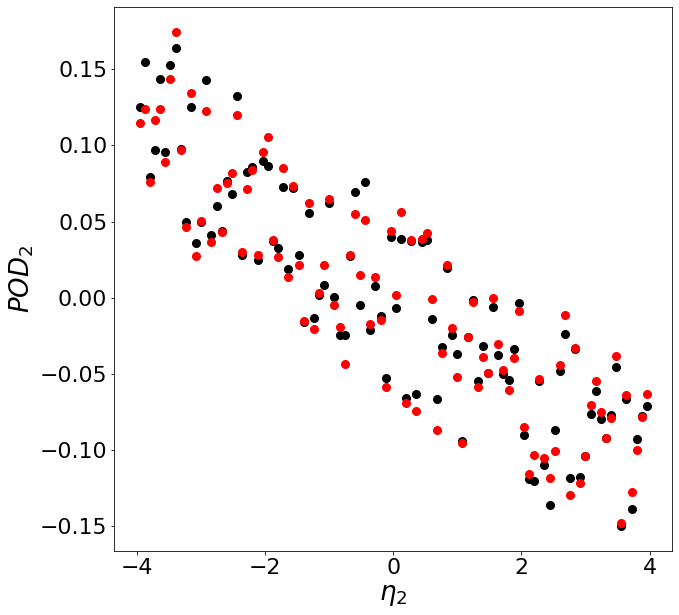

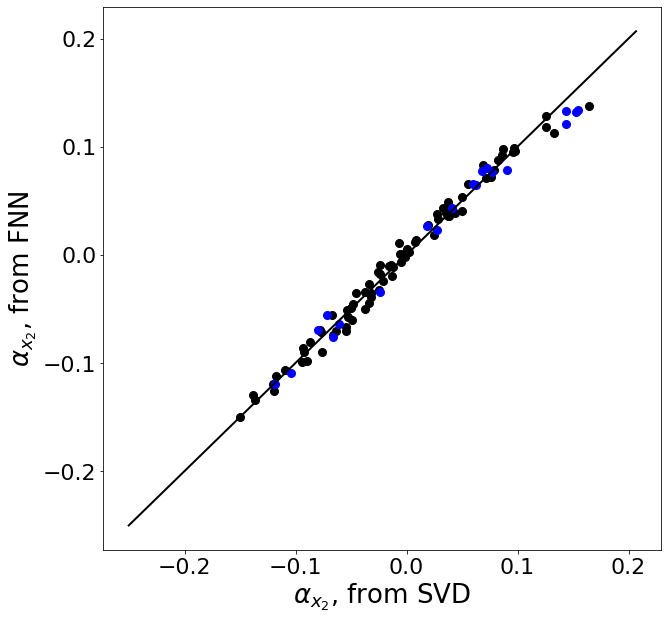

In [5]:
### Evaluating on Test Data

iVar       = 1

VarOI      = 'POD_2'

Vars       = ['POD_'+str(iPOD+1) for iPOD in range(InputData.NPODs)]+['C','D']

FileName   = InputData.PathToDataFld + '/test/ext/Input.csv'# + InputData.InputFile
DataIn     = pd.read_csv(FileName, header=0)
Input      = DataIn.to_numpy()
VarNames   = list(DataIn.columns)

FileName   = InputData.PathToDataFld + '/test/ext/Output.csv'# + InputData.InputFile
Data       = pd.read_csv(FileName, header=0)
Output     = Data.to_numpy()

FileName   = InputData.PathToDataFld + '/train/pts/Input.csv'# + InputData.InputFile
DataIn     = pd.read_csv(FileName, header=0)
InputTrain = DataIn.to_numpy()
VarNames   = list(DataIn.columns)

FileName   = InputData.PathToDataFld + '/train/pts/Output.csv'# + InputData.InputFile
Data       = pd.read_csv(FileName, header=0)
OutputTrain= Data.to_numpy()

FileName   = InputData.PathToDataFld + '/valid/pts/Input.csv'# + InputData.InputFile
DataIn     = pd.read_csv(FileName, header=0)
InputValid = DataIn.to_numpy()
VarNames   = list(DataIn.columns)

FileName   = InputData.PathToDataFld + '/valid/pts/Output.csv'# + InputData.InputFile
Data       = pd.read_csv(FileName, header=0)
OutputValid= Data.to_numpy()

## Variable to Be Visualized
for iPOD in range(len(Vars)):
    if (Vars[iPOD] == VarOI):
        print('iPOD = ', iPOD)
        break
iPOD_     = iPOD
        
yMat      = model.predict(Input)    
yMatTrain = model.predict(InputTrain)    
yMatValid = model.predict(InputValid)    

plt.figure(figsize=(10,10))
plt.plot(Input[:,iVar], Output[:,iPOD], 'ko')
plt.plot(Input[:,iVar], yMat[:,iPOD_], 'ro')
# plt.plot(InputTrain[:,iPC], OutputTrain[:,iVar], 'ko')
# plt.plot(InputTrain[:,iPC], yMatTrain[:,iVar], 'ro')
# plt.plot(InputValid[:,iPC], OutputValid[:,iVar], 'bo')
# plt.plot(InputValid[:,iPC], yMatValid[:,iVar], 'go')
plt.xlabel(r'$\eta_{'+str(iVar+1)+'}$')
plt.ylabel(r'$'+VarOI+'$')
#plt.xlim([1.e-6,1.e-2])
#plt.legend()
#plt.show()

MinFact = 1.e-3
MaxFact = 1.5

plt.figure(figsize=(10,10))
plt.plot(OutputTrain[:,iPOD], yMatTrain[:,iPOD_], 'ko')
plt.plot(OutputValid[:,iPOD], yMatValid[:,iPOD_], 'bo')
plt.plot([yMatTrain[:,iPOD_].min()-0.1, yMatTrain[:,iPOD_].max()*MaxFact],[yMatTrain[:,iPOD_].min()-0.1, yMatTrain[:,iPOD_].max()*MaxFact], 'k-')
plt.xlabel(r'$\alpha_{x_'+str(iPOD+1)+'}$'+', from SVD')
plt.ylabel(r'$\alpha_{x_'+str(iPOD+1)+'}$'+', from FNN')
#plt.xlim([yMatTrain[:,iVar].min()*MinFact, yMatTrain[:,iVar].max()*MaxFact])
#plt.ylim([yMatTrain[:,iVar].min()*MinFact, yMatTrain[:,iVar].max()*MaxFact])


Text(0.5, 0, '$POD_2$')

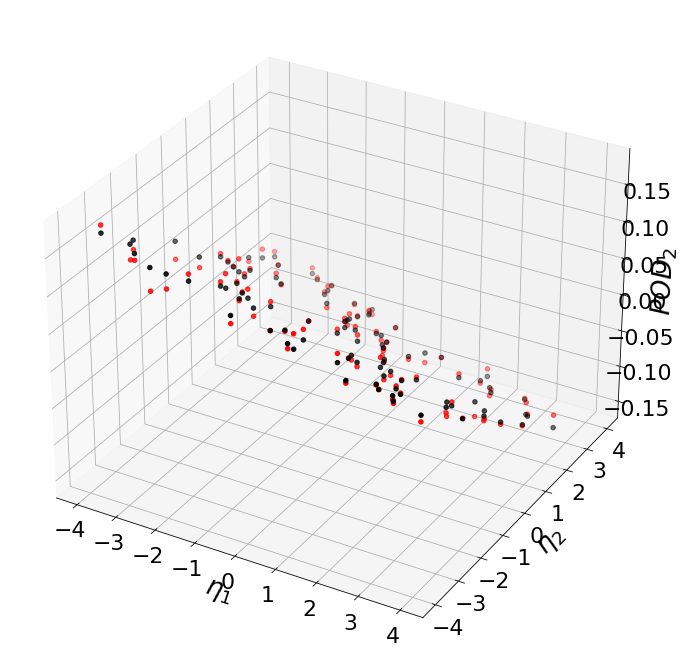

In [6]:
# %matplotlib qt

iVar = 1

fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(projection='3d')
ax.scatter(Input[:,0], Input[:,1], Output[:,iVar], c='k')
ax.scatter(Input[:,0], Input[:,1], yMat[:,iVar], c='r')
ax.set_xlabel(r'$\eta_{'+str(1)+'}$')
ax.set_ylabel(r'$\eta_{'+str(2)+'}$')
ax.set_zlabel(r'$'+Vars[iVar]+'$')

In [7]:
# print('[PCA]  Max % Error = ', np.max(abs((yMat - Output)/yMat)*100))
# print('[PCA]  Max      SE = ', np.max((yMat - Output)**2))
# print('[PCA] Mean % Error = ', np.mean(abs((yMat - Output)/yMat)*100))
# print('[PCA]          MSE = ', np.mean((yMat - Output)**2))

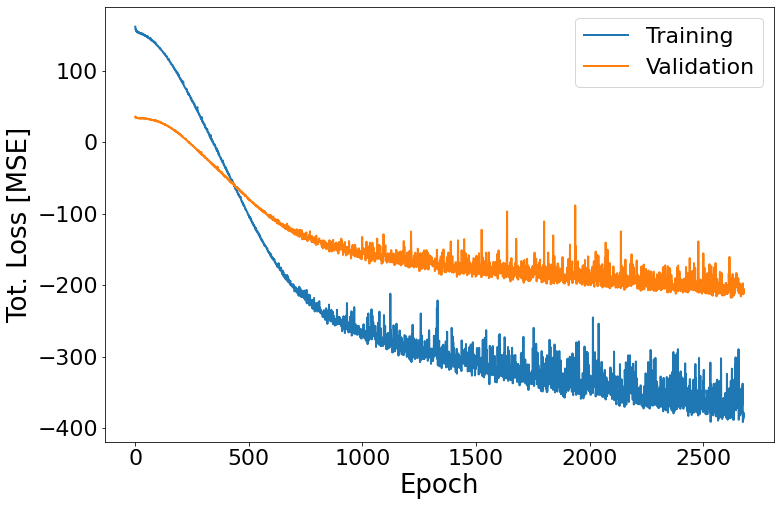

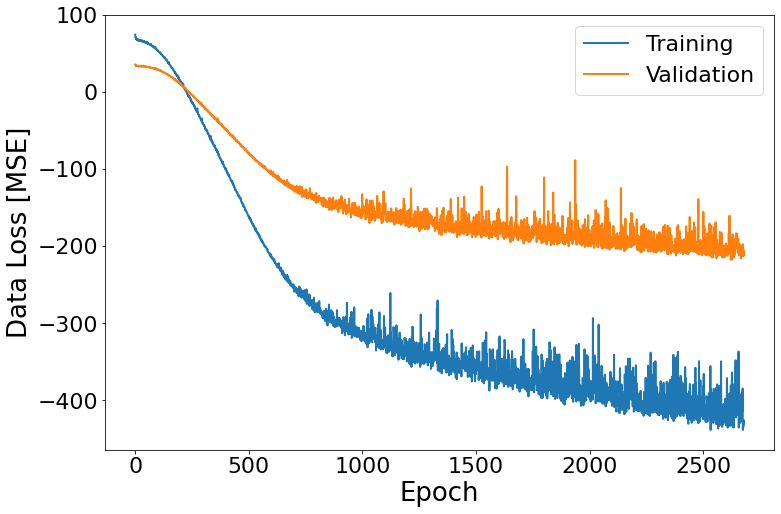

In [8]:
Data    = pd.read_csv(PathToRunFld+'/Training/History.csv')

# OldRun  = 'Run_39'
# DataOld = pd.read_csv(PathToRunFld+'/../'+OldRun+'/Training/History.csv')

fig  = plt.figure(figsize=(12,8))
plt.plot(Data['tot_loss'],      label='Training')
plt.plot(Data['val_tot_loss'],  label='Validation')
# plt.plot(DataOld['tot_loss'],     label='Training, '+OldRun)
# plt.plot(DataOld['val_tot_loss'], label='Validation, '+OldRun)
plt.xlabel('Epoch')
plt.ylabel('Tot. Loss [MSE]')
plt.legend()
#plt.yscale('log')


fig  = plt.figure(figsize=(12,8))
plt.plot(Data['pts_loss'],      label='Training')
plt.plot(Data['val_pts_loss'],  label='Validation')
# plt.plot(DataOld['pts_loss'],     label='Training, '+OldRun)
# plt.plot(DataOld['val_pts_loss'], label='Validation, '+OldRun)
plt.xlabel('Epoch')
plt.ylabel('Data Loss [MSE]')
plt.legend()
#plt.yscale('log')
#plt.ylim([1.e-2, 1.e0])

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['scs_loss'],     label='Training')
# plt.plot(Data['val_scs_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('S.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

# fig  = plt.figure(figsize=(12,8))
# plt.plot(Data['ics_loss'],     label='Training')
# plt.plot(Data['val_ics_loss'], label='Validation')
# plt.xlabel('Epoch')
# plt.ylabel('I.C.s Loss [MSE]')
# plt.legend()
# plt.yscale('log')

In [9]:
import tensorflow as tf

LName   = 'Trunk_1_HL' + str(len(InputData.ActFun[0]))

inputs  = tf.keras.Input(shape=(1,))

Output_ = inputs
for f in model.net.PreLayersVecs:
    Output_ = f(Output_, training=False)

Mu_ = Output_
for i in range(len(model.net.FNNLayersVecs_Mu)):
    print(model.net.FNNLayersVecs_Mu[i].name)
    Layer   = model.net.FNNLayersVecs_Mu[i]
    Mu_ = Layer(Mu_)

Branch_Mu = keras.Model(inputs=inputs, outputs=Mu_)
#Branch_Mu.summary()

Sigma_ = Output_
for i in range(len(model.net.FNNLayersVecs_Sigma)):
    print(model.net.FNNLayersVecs_Sigma[i].name)
    Layer   = model.net.FNNLayersVecs_Sigma[i]
    Sigma_ = Layer(Sigma_)

Branch_Sigma = keras.Model(inputs=inputs, outputs=Sigma_)
#Branch_Sigma.summary()

Trunk_1_HL1
Trunk_1_HL2
Trunk_1_HL3
Trunk_1_HL4
Trunk_1_Sigma_HL1
Trunk_1_Sigma_HL2


Text(0.5, 0, '$\\Psi_{2}$')

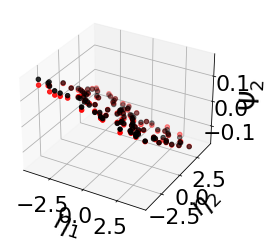

In [10]:
iVar = 1

MuVec = Branch_Mu.predict(Input)

fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
ax.scatter(Input[:,0], Input[:,1], Output[:,iVar], c='k')
ax.scatter(Input[:,0], Input[:,1], MuVec[:,iVar],    c='r')
ax.set_xlabel(r'$\eta_{'+str(1)+'}$')
ax.set_ylabel(r'$\eta_{'+str(2)+'}$')
ax.set_zlabel(r'$\Psi_{'+str(iVar+1)+'}$')

Text(0.5, 0, '$\\sigma_{\\Psi_{3}}$')

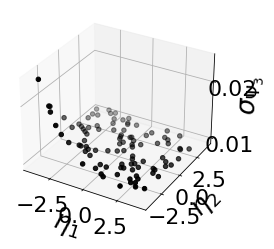

In [11]:
iVar = 2

SigmaVec = Branch_Sigma.predict(Input)
SigmaVec = 1e-8 + tf.math.softplus(0.05 * SigmaVec)
                        
fig = plt.figure()
ax  = fig.add_subplot(projection='3d')
ax.scatter(Input[:,0], Input[:,1], SigmaVec[:,iVar], c='k')
ax.set_xlabel(r'$\eta_{'+str(1)+'}$')
ax.set_ylabel(r'$\eta_{'+str(2)+'}$')
ax.set_zlabel(r'$\sigma_{\Psi_{'+str(iVar+1)+'}}$')

In [12]:
import h5py
import tensorflow as tf
from keras    import backend
from keras    import __version__ as keras_version  # pylint: disable=g-import-not-at-top
from keras.saving import saving_utils


def _legacy_weights(layer):
    """DO NOT USE.
    For legacy reason, the layer.weights was in the order of
    [self.trainable_weights + self.non_trainable_weights], and this order was
    used for preserving the weights in h5 format. The new order of layer.weights
    are the same as layer.get_weights() which is more intuitive for user. To
    keep supporting the existing saved h5 file, this method should be used to
    save/load weights. In future version, we will delete this method and
    introduce a breaking change for h5 and stay with the new order for weights.
    Args:
    layer: a `tf.keras.Model` or `tf.keras.layers.Layer` instance.
    Returns:
    A list of variables with the order of trainable_weights, followed by
      non_trainable_weights.
    """
    weights = layer.trainable_weights + layer.non_trainable_weights
    if any(not isinstance(w, tf.Variable) for w in weights):
        raise NotImplementedError(
            f'Save or restore weights that is not an instance of `tf.Variable` is '
            f'not supported in h5, use `save_format=\'tf\'` instead. Received a '
            f'model or layer {layer.__class__.__name__} with weights {weights}')
    return weights



def save_attributes_to_hdf5_group(group, name, data):
    HDF5_OBJECT_HEADER_LIMIT = 64512
    
    bad_attributes = [x for x in data if len(x) > HDF5_OBJECT_HEADER_LIMIT]

    # Expecting this to never be true.
    if bad_attributes:
        raise RuntimeError('The following attributes cannot be saved to HDF5 '
                           'file because they are larger than %d bytes: %s' %
                           (HDF5_OBJECT_HEADER_LIMIT, ', '.join(bad_attributes)))

    data_npy = np.asarray(data)

    num_chunks = 1
    chunked_data = np.array_split(data_npy, num_chunks)

    # This will never loop forever thanks to the test above.
    while any(x.nbytes > HDF5_OBJECT_HEADER_LIMIT for x in chunked_data):
        num_chunks += 1
        chunked_data = np.array_split(data_npy, num_chunks)

    if num_chunks > 1:
        for chunk_id, chunk_data in enumerate(chunked_data):
            group.attrs['%s%d' % (name, chunk_id)] = chunk_data
    else:
        group.attrs[name] = data

        
def load_attributes_from_hdf5_group(group, name):
    """Loads attributes of the specified name from the HDF5 group.
    This method deals with an inherent problem
    of HDF5 file which is not able to store
    data larger than HDF5_OBJECT_HEADER_LIMIT bytes.
    Args:
      group: A pointer to a HDF5 group.
      name: A name of the attributes to load.
    Returns:
      data: Attributes data.
    """
    if name in group.attrs:
        data = [
            n.decode('utf8') if hasattr(n, 'decode') else n
            for n in group.attrs[name]
        ]
    else:
        data = []
        chunk_id = 0
        while '%s%d' % (name, chunk_id) in group.attrs:
            data.extend([
              n.decode('utf8') if hasattr(n, 'decode') else n
              for n in group.attrs['%s%d' % (name, chunk_id)]
          ])
        chunk_id += 1
    return data


def save_weights_to_hdf5_group(f, layers, old_string, new_string):

    layer_names_temp = load_attributes_from_hdf5_group(f_new, 'layer_names')
    layer_names_old  = []
    for layer in layer_names_temp:
        layer_names_old.append(layer.encode('utf8'))
    
    layer_names = []
    for layer in layers:
        print(layer.name)
        if ('Trunk_1' in layer.name):
            layer_name = layer.name.replace(old_string, new_string) #############
            layer_names.append(layer_name.encode('utf8'))
            layer._name = layer_name

    save_attributes_to_hdf5_group(f, 'layer_names', layer_names+layer_names_old)
    f.attrs['backend'] = backend.backend().encode('utf8')
    f.attrs['keras_version'] = str(keras_version).encode('utf8')

    # Sort model layers by layer name to ensure that group names are strictly
    # growing to avoid prefix issues.
    for layer in sorted(layers, key=lambda x: x.name):
        if ('Branch' in layer.name):
            layer_name    = layer.name.replace(old_string, new_string) ############# 
            g             = f.create_group(layer_name)
            weights       = _legacy_weights(layer)
            weight_values = backend.batch_get_value(weights)

            weight_names = []
            for w in weights:
                w_name = w.name.replace(old_string, new_string) ############# 
                weight_names.append(w_name.encode('utf8'))
            #weight_names = [w.name.encode('utf8') for w in weights]
            save_attributes_to_hdf5_group(g, 'weight_names', weight_names)
            for name, val in zip(weight_names, weight_values):
                param_dset = g.create_dataset(name, val.shape, dtype=val.dtype)
                if not val.shape:
                    # scalar
                    param_dset[()] = val
                else:
                    param_dset[:] = val

In [13]:
try:
    os.makedirs(InputData.PathToDataFld+'/../../FNN/')
except:
    pass
filename_new = InputData.PathToDataFld+'/../../FNN/Final.h5'

f_new        = h5py.File(filename_new, 'a')

save_weights_to_hdf5_group(f_new, NN.layers, 'Trunk_1', 'Branch_'+InputData.InputVars[InputData.iROD-1])

f_new.close()

OSError: Unable to create file (unable to open file: name = '/Users/sventuri/WORKSPACE//ROMNet/romnet//../Data/MSD_100Cases/Orig/All/POD_All/Branch_2//../../FNN/Final.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = a02)

In [ ]:
f_new.close()

In [ ]:
f_new        = h5py.File(filename_new, 'a')

data = load_attributes_from_hdf5_group(f_new, 'layer_names')
data

f_new.close()

In [93]:
locs   = [ -1,   1]
scales = [0.1, 0.5]

norm_d  = tfp.distributions.Normal(loc=locs, scale=scales)
multi_d = tfp.distributions.MultivariateNormalDiag(loc=locs, scale_diag=scales)

In [95]:
multi_d.sample(1)

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[-1.1099818,  1.0034456]], dtype=float32)>

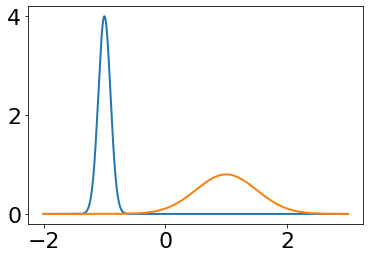

In [98]:

# Plot the PDF.
import matplotlib.pyplot as plt
x = tf.linspace(-2., 3., int(1e4))[..., np.newaxis]
plt.plot(x, norm_d.prob(x))
#plt.plot(x, multi_d.prob(x))

In [123]:
# Create a mixture of two Gaussians:
tfd = tfp.distributions
mix = 0.3
bimix_gauss = tfd.Mixture(
  cat=tfd.Categorical(probs=[0.4, 0.6]),
  components=[
    tfd.Normal(loc=-1.+3, scale=0.1),
    tfd.Normal(loc=+1.+3, scale=0.5),
             ]
  )

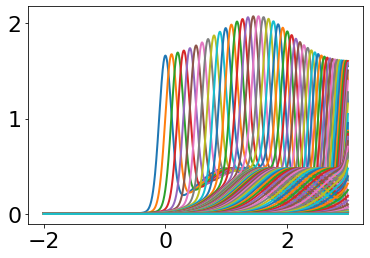

In [133]:
tVec = tf.linspace(0.,5.,100)

bimix_gauss = []
for i, t in enumerate(tVec):

    bimix_gauss.append(tfd.Mixture(
      cat=tfd.Categorical(probs=[0.4, 0.6]),
      components=[
        tfd.Normal(loc=np.sin(t)+t, scale=0.1),
        tfd.Normal(loc=np.cos(t)+t, scale=0.5),
                 ]
      ))
    
    x = tf.linspace(-2., 3., int(1e4))[..., np.newaxis]
    plt.plot(x, bimix_gauss[i].prob(x))

In [70]:
aa = tfp.distributions.Normal(0., 1., name='aa')
bb = tfp.distributions.Normal(0., 1., name='bb')
cc = tfp.distributions.Normal(0., 1., name='cc')

In [137]:
tfd   = tfp.distributions
joint = tfd.JointDistributionSequential([aa,bb,cc, lambda a,b,c: tfd.Sample(tfd.Normal(loc=aa*bb+cc, scale=1.), 12)])

In [176]:
model = tfd.JointDistributionSequential([
    tfd.Normal(tf.zeros([1]), tf.ones([1])),
    tfd.Normal(tf.zeros([1]), tf.ones([1])),
    tfd.Normal(tf.zeros([1]), tf.ones([1])),
    lambda y, x, z: tfd.Independent(tfd.Normal(x*y+z, 1.e-10), reinterpreted_batch_ndims=1)
    ], batch_ndims=None)

In [182]:
model.prob(np.array([[1,2,3]]))

ValueError: Attempt to convert a value (None) with an unsupported type (<class 'NoneType'>) to a Tensor.

ValueError: x and y must have same first dimension, but have shapes (10000, 1) and (1,)

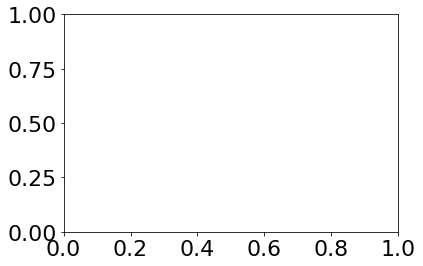

In [178]:
x = tf.linspace(-3., 3., int(1e4))[..., np.newaxis]
plt.plot(x, model.prob(x))

In [169]:
aa = tfd.Normal(tf.zeros([1]), tf.ones([1]))
bb = tfd.Normal(0., 1.)

In [170]:
bb.prob(np.zeros((100,1)))

<tf.Tensor: shape=(100, 1), dtype=float32, numpy=
array([[0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.3989423],
       [0.

In [147]:
aa = tfd.Normal(0., tf.ones([3]))

In [148]:
aa.log_prob([ 0.9953713 , -1.4236408 , -0.12065739])

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.4143205, -1.9323151, -0.9262176], dtype=float32)>

In [61]:
mdl_ols_.sample()

[<tf.Tensor: shape=(), dtype=float32, numpy=0.8294719>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-0.7133498>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.3868407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-1.8636951>]

In [62]:
0.8294719*(-1.3868407)-0.7133498

-1.8636951904263301

In [65]:
aa = tfp.distributions.MultivariateNormalDiag(loc=[1,-1], scale_diag=[1.,1.])

In [68]:
aa[0]

InvalidArgumentError: slice index 0 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/